In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv('objective_20210817-213751.csv')

In [3]:
df

,1,2,3
0,373.745531,358.486659,336.477337
1,386.200330,370.008639,336.606179
2,386.968561,368.707891,337.162651
3,386.200799,370.488446,339.281505
4,379.667978,369.437642,336.994225
...,...,...,...
495,388.276850,370.736715,341.160014
496,385.345152,360.441176,338.582654
497,380.951390,347.363181,331.562438
498,386.853444,368.713838,336.477337


In [4]:
df['3'][df['3']==max(df['3'])]=max(df['2'])

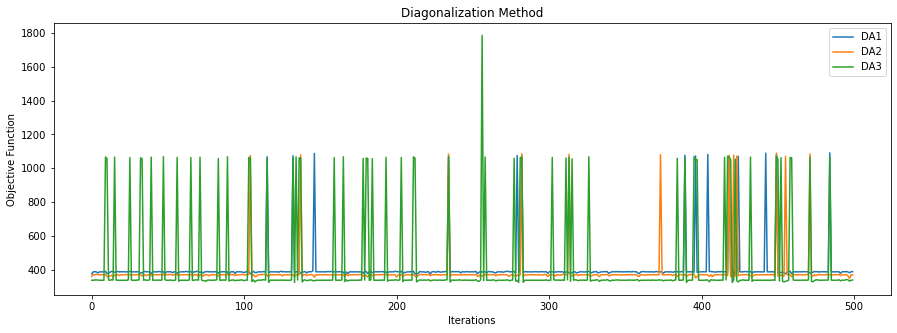

<Figure size 432x288 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
x=np.arange(500)
y=df['1']
ax.plot(x,y)
y=df['2']
ax.plot(x,y)
y=df['3']
ax.plot(x,y)
ax.legend(['DA1','DA2','DA3'],loc='upper right')
plt.xlabel("Iterations")
plt.ylabel("Objective Function")
plt.title("Diagonalization Method")
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Objective_Function.png', dpi=100)

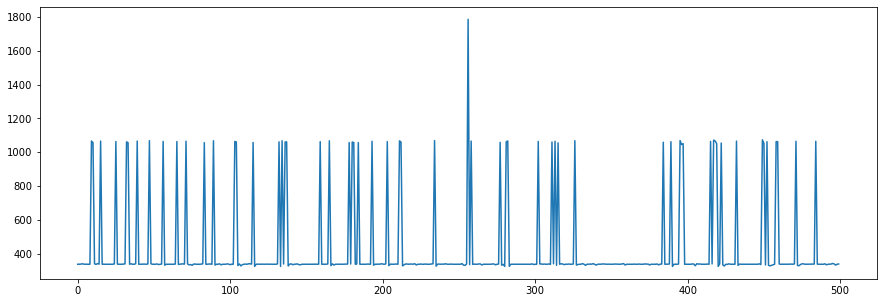

In [5]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
x=np.arange(500)
y=df['3']
ax.plot(x,y)
plt.show()

In [6]:
np.argmax(df.sum(axis=1))

449

In [7]:
import seaborn as sns
sns.set()

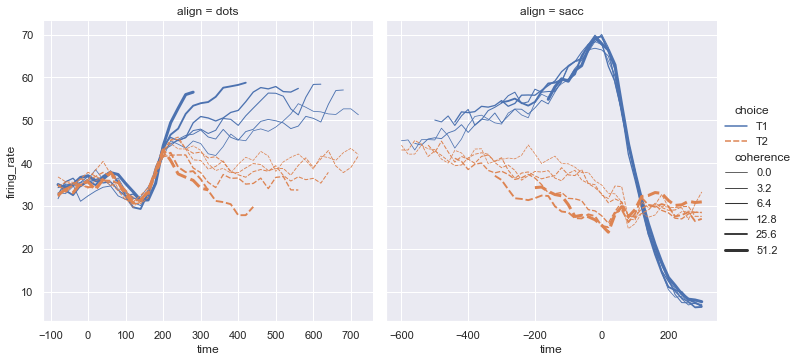

In [33]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

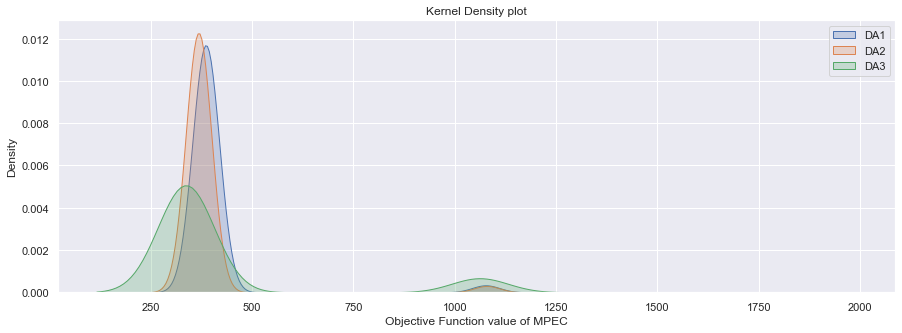

<Figure size 432x288 with 0 Axes>

In [8]:
# Histogram
fig = plt.figure(figsize=(15,5))
# ax = fig.add_subplot(111)
for col in df.columns:
    ax = sns.kdeplot(df[col], shade=True, legend=True)
ax.set(xlabel='Objective Function value of MPEC', title='Kernel Density plot')
# plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.legend(loc='upper right', labels=['DA1', 'DA2', 'DA3'])
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Objective_Function_Density.png', dpi=100)

In [44]:
max(df['3'])

1088.8818372784822

### 3d Plot function values

In [61]:
# https://www.python-graph-gallery.com/371-surface-plot

data = pd.read_csv('objective_20210817-213751.csv')
data.columns=["DA1","DA2","DA3"]
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes


In [35]:
df

,X,Y,Z
0,0,0,373.745531
1,0,1,386.200330
2,0,2,386.968561
3,0,3,386.200799
4,0,4,379.667978
...,...,...,...
1495,2,495,341.160014
1496,2,496,338.582654
1497,2,497,331.562438
1498,2,498,336.477337


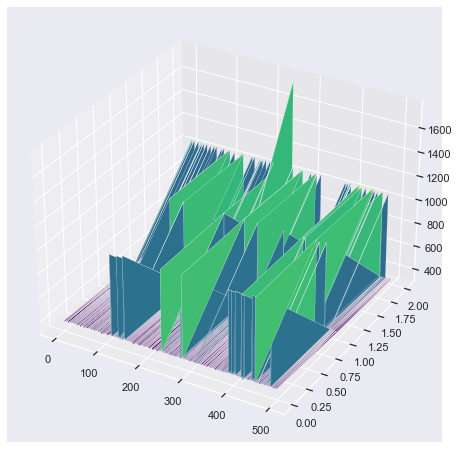

In [36]:
# Make the plot
fig = plt.figure(figsize=(8,8))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf( df['Y'], df['X'] , df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

In [41]:
df['X'].max()

2

In [28]:
# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)

In [29]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,100,100,101,101,101,101,101,100,100,100,...,107,107,107,106,106,105,105,104,104,103
1,101,101,102,102,102,102,102,101,101,101,...,108,108,107,107,106,106,105,105,104,104
2,102,102,103,103,103,103,103,102,102,102,...,109,108,108,107,107,106,106,105,105,104
3,103,103,104,104,104,104,104,103,103,103,...,109,109,108,108,107,107,106,106,105,105
4,104,104,105,105,105,105,105,104,104,103,...,110,109,109,108,107,107,107,106,106,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,99,99,99,99,100,100,101,101,102,102,...,95,95,95,95,94,94,94,94,94,94
83,98,99,99,99,99,100,100,101,101,102,...,95,95,94,94,94,94,94,94,94,94
84,98,98,98,99,99,99,100,100,101,101,...,94,94,94,94,94,94,94,94,94,94
85,97,98,98,98,99,99,99,100,100,100,...,94,94,94,94,94,94,94,94,94,94


In [30]:
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

In [31]:
df

,X,Y,Z
0,V1,0,100
1,V1,1,101
2,V1,2,102
3,V1,3,103
4,V1,4,104
...,...,...,...
5302,V61,82,94
5303,V61,83,94
5304,V61,84,94
5305,V61,85,94


<ipython-input-32-22098345a761>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


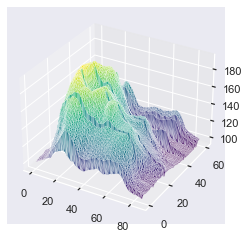

In [32]:
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

In [33]:
df

,X,Y,Z
0,0,0,100
1,0,1,101
2,0,2,102
3,0,3,103
4,0,4,104
...,...,...,...
5302,57,82,94
5303,57,83,94
5304,57,84,94
5305,57,85,94


## Method 2

In [60]:
#  https://stackoverflow.com/a/68092340

def plottable_3d_info(df: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df.index
    columns = df.columns

    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[df[c][i] for c in columns] for i in index])
    
    xticks = dict(ticks=np.arange(len(columns)), labels=columns)
    yticks = dict(ticks=np.arange(len(index)), labels=index)
    
    return x, y, z, xticks, yticks

In [43]:
data = pd.read_csv('objective_20210817-213751.csv')
data.columns=["DA1","DA2","DA3"]

### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(data)

In [46]:
z

array([[373.74553064, 358.48665911, 336.47733708],
       [386.20032954, 370.00863879, 336.60617899],
       [386.96856128, 368.70789131, 337.1626508 ],
       ...,
       [380.95138959, 347.36318139, 331.5624383 ],
       [386.8534438 , 368.71383788, 336.47733708],
       [387.43594984, 368.70789131, 337.9572466 ]])

<ipython-input-47-275c2f71ae20>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = plt.figure().gca(projection='3d')


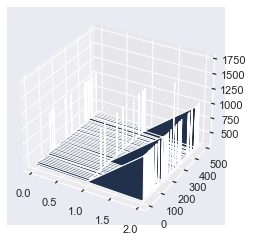

In [47]:
### Set up axes and put data on the surface.
axes = plt.figure().gca(projection='3d')
axes.plot_surface(x, y, z)

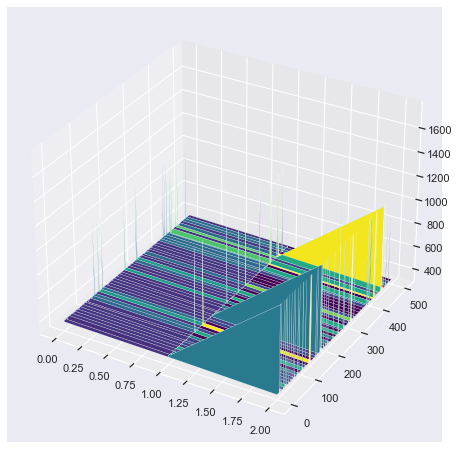

In [49]:
fig = plt.figure(figsize=(8,8))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface( x,y,z, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

## Method 3: remove one column

In [56]:
data = pd.read_csv('objective_20210817-213751.csv')
data.columns=["DA1","DA2","DA3"]

data.drop(columns=['DA1'], inplace=True)

In [57]:
### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(data)

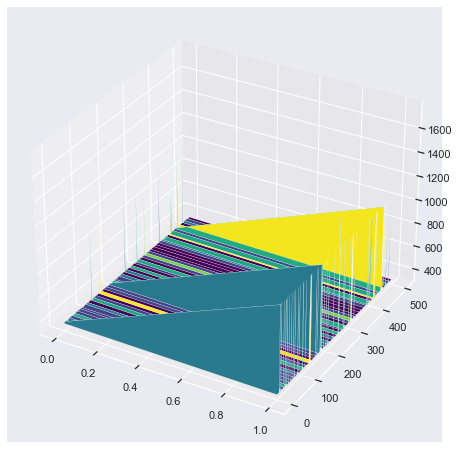

In [58]:
fig = plt.figure(figsize=(8,8))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface( x,y,z, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

In [59]:
data = pd.read_csv('objective_20210817-213751.csv')
data.columns=["DA1","DA2","DA3"]
data

,DA1,DA2,DA3
0,373.745531,358.486659,336.477337
1,386.200330,370.008639,336.606179
2,386.968561,368.707891,337.162651
3,386.200799,370.488446,339.281505
4,379.667978,369.437642,336.994225
...,...,...,...
495,388.276850,370.736715,341.160014
496,385.345152,360.441176,338.582654
497,380.951390,347.363181,331.562438
498,386.853444,368.713838,336.477337
